In [58]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pytesseract
%matplotlib inline

In [59]:
filename ='test_0.jpg'

In [60]:
img = Image.open(filename)

In [34]:
pytesseract.image_to_string(img)

TesseractNotFoundError: tesseract is not installed or it's not in your path

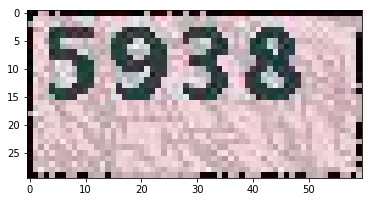

In [61]:
plt.imshow(img)

In [5]:
np_img=np.array(img)

In [6]:
gray_img =cv2.cvtColor(np_img,cv2.COLOR_BGR2GRAY)

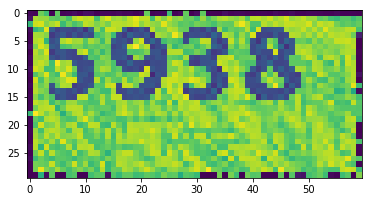

In [7]:
plt.imshow(gray_img)

In [8]:
thresh,black_img = cv2.threshold(gray_img,127,255,0)

In [9]:
black_img

array([[  0,   0, 255, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255,   0, 255]], dtype=uint8)

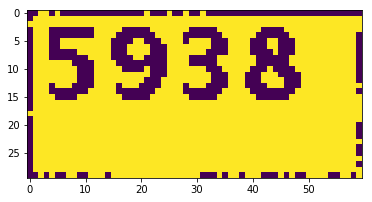

In [10]:
plt.imshow(black_img)

In [11]:
black_img.shape

(30, 60)

In [12]:
black_img_copy=black_img.copy()

In [13]:
black_img_copy.shape

(30, 60)

In [ ]:
black_img_copy[0,:]

In [ ]:
tmp_img = np.zeros(black_img_copy.shape)

In [ ]:
plt.imshow(tmp_img)

In [ ]:
tmp_img[0,:]=255

In [ ]:
tmp_img[-1,:]=255

In [ ]:
tmp_img[:,0]=255

In [ ]:
tmp_img[:,-1]=255

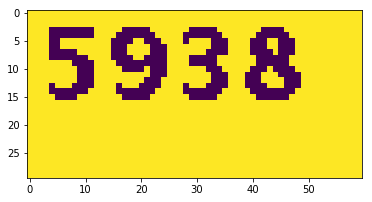

In [15]:
plt.imshow(black_img_copy)

In [14]:
black_img_copy[0,:]=255
black_img_copy[-1,:]=255
black_img_copy[:,0]=255
black_img_copy[:,-1]=255

In [15]:
(new_img,contours,hiera)=cv2.findContours(black_img_copy,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
cnts=[]
for idx,c in enumerate(contours):
    (x,y,w,h)=cv2.boundingRect(c)
    print(x,y,w,h)
    if w>5 and w<15:
        cnts.append(black_img_copy[y:y+h,x:x+w])

0 0 60 30
38 2 12 15
42 10 4 4
43 5 2 3
27 2 10 15
14 2 12 15
18 5 4 4
3 2 10 15


In [17]:
len(cnts)

4

In [37]:
cnts

[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255],
        [255, 255,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255],
        [255, 255,   0,   0,   0,   0, 255,   0,   0,   0, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255,   0,   0,   0, 255,   0,   0,   0,   0, 255, 255],
        [255,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0, 255],
        [255,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0, 255],
        [255,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0, 255],
        [255, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
        [255, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255],
        [255, 255, 2

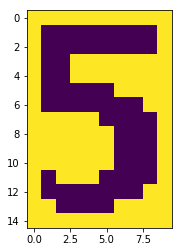

In [18]:
plt.imshow(cnts[3])

In [19]:
pytesseract.image_to_string(cnts[3])

TesseractNotFoundError: tesseract is not installed or it's not in your path

In [51]:
import pickle

In [55]:
with open('img.pkl','wb') as f:
    pickle.dump(cnts,f)

In [46]:
type(cnts)

list

In [24]:
new_size=[]
for i in cnts:
    print(i.shape)
    new_size.append(cv2.resize(i,(12,15),interpolation=cv2.INTER_AREA))

(15, 12)
(15, 10)
(15, 12)
(15, 10)


In [25]:
for i in new_size:
    print(i.shape)

(15, 12)
(15, 12)
(15, 12)
(15, 12)


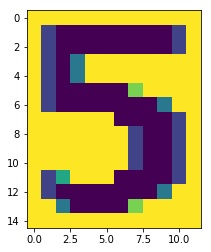

In [29]:
plt.imshow(new_size[3])

In [30]:
for i in new_size[0]:
    print(i)

[255 255 255 255 255 255 255 255 255 255 255 255]
[255 255 255 255   0   0   0   0 255 255 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255   0   0   0 255 255   0   0   0 255 255]
[255 255   0   0   0 255 255   0   0   0 255 255]
[255 255   0   0   0   0 255   0   0   0 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255   0   0   0 255   0   0   0   0 255 255]
[255   0   0   0 255 255 255   0   0   0   0 255]
[255   0   0   0 255 255 255 255   0   0   0 255]
[255   0   0   0   0 255 255 255   0   0   0 255]
[255 255   0   0   0   0   0   0   0   0 255 255]
[255 255 255   0   0   0   0   0   0 255 255 255]
[255 255 255 255 255 255 255 255 255 255 255 255]


In [2]:
import os
os.chdir('xl')

In [3]:
# 使用80个样本
sample_size = 80
input_folder = r'E:\git\base_function\image_detect\xl\{}'

In [38]:
file=r'0\test_0-3.jpg'

In [61]:
img = Image.open(file).convert('1')
# img
np_img = np.array(img)
# thresh,ret_img=cv2.threshold(np_img,127,255,0)
# gray_img = cv2.cvtColor(np_img,cv2.COLOR_BGR2GRAY)

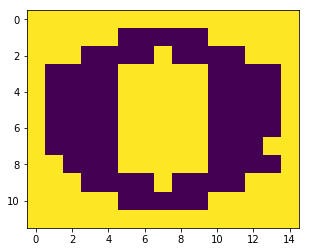

In [62]:
plt.imshow(np_img)

In [63]:
np_img

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False, False,  True, False,
        False, False, False,  True,  True,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False, False,  True],
       [ True, False, False, False, False,  True,  True,  True,  True,
         True, False, False, False,  True,  True],
       [ True,  True, Fa

In [130]:
dataset=[]
labels=[]

In [131]:
for i in range(10):
    path=input_folder.format(i)
    for file in os.listdir(path)[:80]:
        full_path = path+'\\'+file
        img=Image.open(full_path).convert('1')
#         np_img=np.array(img)
        dataset.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [132]:
len(dataset)

800

In [133]:
len(labels)

800

In [11]:
dataset[0]

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 255,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255]

In [134]:
np_dataset=np.array(dataset)

In [135]:
np_dataset.shape

(800, 180)

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [137]:
scaler = StandardScaler()
scaler.fit(np_dataset)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [138]:
X_scaled=scaler.transform(np_dataset)

c:\python3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
mlp = MLPClassifier(hidden_layer_sizes=(60,60,60),activation='logistic',max_iter=50000,verbose=True,tol=0.000001)
mlp.fit(X_scaled,labels)

Iteration 1, loss = 2.34780049
Iteration 2, loss = 2.31229911
Iteration 3, loss = 2.29467919
Iteration 4, loss = 2.28692979
Iteration 5, loss = 2.28029640
Iteration 6, loss = 2.27283544
Iteration 7, loss = 2.26308137
Iteration 8, loss = 2.25027304
Iteration 9, loss = 2.23557068
Iteration 10, loss = 2.21903544
Iteration 11, loss = 2.19922300
Iteration 12, loss = 2.17465140
Iteration 13, loss = 2.14622917
Iteration 14, loss = 2.11298655
Iteration 15, loss = 2.07487585
Iteration 16, loss = 2.03154781
Iteration 17, loss = 1.98353513
Iteration 18, loss = 1.93153835
Iteration 19, loss = 1.87591662
Iteration 20, loss = 1.81779781
Iteration 21, loss = 1.75880590
Iteration 22, loss = 1.69900389
Iteration 23, loss = 1.63988578
Iteration 24, loss = 1.58220181
Iteration 25, loss = 1.52620627
Iteration 26, loss = 1.47205112
Iteration 27, loss = 1.42053496
Iteration 28, loss = 1.37140705
Iteration 29, loss = 1.32521077
Iteration 30, loss = 1.28113436
Iteration 31, loss = 1.23952595
Iteration 32, los

Iteration 265, loss = 0.02285885
Iteration 266, loss = 0.02273854
Iteration 267, loss = 0.02262312
Iteration 268, loss = 0.02250603
Iteration 269, loss = 0.02238633
Iteration 270, loss = 0.02228113
Iteration 271, loss = 0.02218216
Iteration 272, loss = 0.02205393
Iteration 273, loss = 0.02194541
Iteration 274, loss = 0.02183368
Iteration 275, loss = 0.02173030
Iteration 276, loss = 0.02163965
Iteration 277, loss = 0.02152212
Iteration 278, loss = 0.02140924
Iteration 279, loss = 0.02130592
Iteration 280, loss = 0.02120963
Iteration 281, loss = 0.02110463
Iteration 282, loss = 0.02100547
Iteration 283, loss = 0.02090514
Iteration 284, loss = 0.02081521
Iteration 285, loss = 0.02071262
Iteration 286, loss = 0.02060721
Iteration 287, loss = 0.02052193
Iteration 288, loss = 0.02041694
Iteration 289, loss = 0.02032341
Iteration 290, loss = 0.02024044
Iteration 291, loss = 0.02015020
Iteration 292, loss = 0.02004912
Iteration 293, loss = 0.01996234
Iteration 294, loss = 0.01987250
Iteration 

Iteration 518, loss = 0.01070824
Iteration 519, loss = 0.01068606
Iteration 520, loss = 0.01066719
Iteration 521, loss = 0.01066119
Iteration 522, loss = 0.01063706
Iteration 523, loss = 0.01063162
Iteration 524, loss = 0.01061340
Iteration 525, loss = 0.01059041
Iteration 526, loss = 0.01058499
Iteration 527, loss = 0.01056435
Iteration 528, loss = 0.01054378
Iteration 529, loss = 0.01053642
Iteration 530, loss = 0.01051687
Iteration 531, loss = 0.01049891
Iteration 532, loss = 0.01048273
Iteration 533, loss = 0.01046887
Iteration 534, loss = 0.01045521
Iteration 535, loss = 0.01043806
Iteration 536, loss = 0.01042847
Iteration 537, loss = 0.01041291
Iteration 538, loss = 0.01040501
Iteration 539, loss = 0.01038188
Iteration 540, loss = 0.01036923
Iteration 541, loss = 0.01036057
Iteration 542, loss = 0.01034392
Iteration 543, loss = 0.01033639
Iteration 544, loss = 0.01031130
Iteration 545, loss = 0.01030616
Iteration 546, loss = 0.01028538
Iteration 547, loss = 0.01027593
Iteration 

Iteration 776, loss = 0.00846014
Iteration 777, loss = 0.00845461
Iteration 778, loss = 0.00844812
Iteration 779, loss = 0.00844590
Iteration 780, loss = 0.00844092
Iteration 781, loss = 0.00843535
Iteration 782, loss = 0.00844306
Iteration 783, loss = 0.00842751
Iteration 784, loss = 0.00842879
Iteration 785, loss = 0.00842178
Iteration 786, loss = 0.00842188
Iteration 787, loss = 0.00841347
Iteration 788, loss = 0.00841050
Iteration 789, loss = 0.00840514
Iteration 790, loss = 0.00839799
Iteration 791, loss = 0.00840009
Iteration 792, loss = 0.00839346
Iteration 793, loss = 0.00839589
Iteration 794, loss = 0.00838805
Iteration 795, loss = 0.00837882
Iteration 796, loss = 0.00838069
Iteration 797, loss = 0.00837115
Iteration 798, loss = 0.00836565
Iteration 799, loss = 0.00836595
Iteration 800, loss = 0.00835655
Iteration 801, loss = 0.00835482
Iteration 802, loss = 0.00834868
Iteration 803, loss = 0.00834917
Iteration 804, loss = 0.00834178
Iteration 805, loss = 0.00834010
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [149]:
predict = mlp.predict(X_scaled)

In [150]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [151]:
from sklearn.externals import joblib
joblib.dump(mlp,'xlcaptcha.pkl')

['xlcaptcha.pkl']

In [110]:
test_data=[]
file=input_folder.format(3)+'\\0.jpg'
# file='0.jpg'
img = Image.open(file).convert('1')

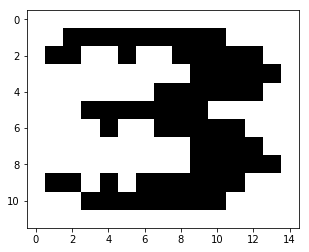

In [111]:
plt.imshow(img)

In [112]:
test_data.append([pixel for pixel in iter(img.getdata())])

In [113]:
test_data

[[255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  255,
  255,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  0,
  0,
  255,
  0,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  255,
  255,
  255,
  255,
  255,
  255,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  255,


In [114]:
# scaler = StandardScaler()
# scaler.fit(test_data)
X_test_scaled=scaler.transform(test_data)

In [115]:
y_predict=mlp.predict(X_test_scaled)

In [116]:
y_predict[0]

2

In [37]:
os.listdir('.')

['.ipynb_checkpoints',
 '0.jpg',
 '1.jpg',
 '100-crop-2.gif',
 '1009-0.jpg',
 '1009-1.jpg',
 '1009-2.jpg',
 '1009-3.jpg',
 '1009-4.jpg',
 '10091-0.jpg',
 '10091-1.jpg',
 '10091-2.jpg',
 '10091-3.jpg',
 '2.jpg',
 '2998.gif',
 '2999.gif',
 '3.jpg',
 '5.jpg',
 'base_detect.ipynb',
 'basic_usage.py',
 'contour.jpg',
 'cv2_demo.ipynb',
 'data',
 'forest.jpg',
 'image_base.ipynb',
 'image_detect.ipynb',
 'image_low.py',
 'img.pkl',
 'machine_learning_yanzhenma.ipynb',
 'opencv_demo.ipynb',
 'piaoxian1538026942.png',
 'piaoxian1538027109.png',
 'pytesseract_usage.ipynb',
 'retan.jpg',
 'shibiecuowu1537546979.png',
 'testcontours1.bmp',
 'test_0.jpg',
 'test_144.jpg',
 'test_43.jpg',
 'timg.jpg',
 'tw_photo.jpg',
 'word.JPG',
 'xl',
 'xlcaptcha.pkl',
 'xl_code.py',
 'xl_yanzhenma.ipynb',
 'yang_zheng_ma.py',
 'yanzhengma.py',
 'yanzhengma_case1.ipynb',
 '_tessdata',
 '_tesseract.exe']